# Evaluating correlations within ar41 SNCB data

The context of this challenge is the cooling of diesel trains. SNCB’s diesel
trains are AR41 (Belgian Railways Class 41 - Wikipedia) and consist of 2
vehicles which are always coupled. Each of these vehicles is referenced in
the data: some_variable_name_PC1 and some_variable_name_PC2. Each
PC is equipped with 2 cooling systems: one for the engine air intake and
one for the oil of the transmission. In the latter, the water is the coolant
(water-oil intercooler) while in the former air is used as coolant (air-air
intercooler).


## First evaluating naively correlations across the number of observation using Pearson test
### from wikipedia:
In statistics, the Pearson correlation coefficient (PCC)[a] is a correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationships or correlations.

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy

In [2]:

# Assuming df is a DataFrame with time series data
df = pd.read_csv("fitting.csv")
nombre_de_lignes, nombre_de_colonnes = df.shape

In [3]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'mapped_veh_id', 'lat_x', 'lon_x',
       'RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
       'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
       'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'date',
       'time', 'temp', 'wind', 'humidity'],
      dtype='object')

In [18]:
'''df['RS_E_InAirTemp_PC1'] = df['RS_E_InAirTemp_PC1'] + 273.15
df['RS_E_InAirTemp_PC2'] = df['RS_E_InAirTemp_PC2'] + 273.15
df['RS_E_WatTemp_PC1'] = df['RS_E_WatTemp_PC1'] + 273.15
df['RS_E_WatTemp_PC2'] = df['RS_E_WatTemp_PC2'] + 273.15
df['RS_T_OilTemp_PC1'] = df['RS_T_OilTemp_PC1'] + 273.15
df['RS_T_OilTemp_PC2'] = df['RS_T_OilTemp_PC2'] + 273.15'''
df.head(50)

,Unnamed: 0.1,Unnamed: 0,mapped_veh_id,lat_x,lon_x,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,date,time,temp,wind,humidity
0,11278237,3535515,102.0,51.015546,3.774742,278.15,280.15,486.0,527.0,805.0,807.0,310.15,306.15,299.15,301.15,2023-01-23,14,276.90,4.75,82
1,11278129,3417723,102.0,51.015526,3.774732,278.15,280.15,483.0,500.0,799.0,796.0,313.15,309.15,300.15,301.15,2023-01-23,14,276.90,4.75,82
2,11280509,16698246,102.0,51.015522,3.774700,279.15,281.15,414.0,458.0,799.0,798.0,322.15,318.15,306.15,305.15,2023-01-23,14,276.90,4.75,82
3,11280227,14998954,102.0,51.015512,3.774747,280.15,281.15,372.0,417.0,794.0,801.0,325.15,321.15,309.15,311.15,2023-01-23,14,276.90,4.75,82
4,11279139,8969019,102.0,51.015525,3.774709,280.15,282.15,355.0,396.0,797.0,810.0,326.15,323.15,314.15,312.15,2023-01-23,14,276.90,4.75,82
5,11278451,4908193,102.0,51.015505,3.774696,279.15,284.15,313.0,348.0,796.0,799.0,331.15,328.15,319.15,318.15,2023-01-23,14,276.90,4.75,82
6,11278704,6145466,102.0,51.015502,3.774733,279.15,284.15,310.0,345.0,801.0,801.0,332.15,328.15,323.15,319.15,2023-01-23,14,276.90,4.75,82
7,11280229,14998959,102.0,51.015511,3.774734,279.15,284.15,303.0,338.0,803.0,796.0,333.15,329.15,321.15,319.15,2023-01-23,14,276.90,4.75,82
8,11279370,10182850,102.0,51.015766,3.774147,279.15,284.15,286.0,327.0,807.0,799.0,335.15,331.15,324.15,322.15,2023-01-23,14,276.90,4.75,82
9,11279633,11922896,102.0,51.015519,3.774705,279.15,285.15,279.0,307.0,799.0,804.0,336.15,333.15,325.15,325.15,2023-01-23,14,276.90,4.75,82


In [12]:
df[['RS_E_InAirTemp_PC1','RS_E_WatTemp_PC1','RS_T_OilTemp_PC1','RS_E_OilPress_PC1','RS_E_RPM_PC1']].corr('pearson')

,RS_E_InAirTemp_PC1,RS_E_WatTemp_PC1,RS_T_OilTemp_PC1,RS_E_OilPress_PC1,RS_E_RPM_PC1
RS_E_InAirTemp_PC1,1.000000,0.586004,0.565886,-0.120264,0.295097
RS_E_WatTemp_PC1,0.586004,1.000000,0.923366,-0.360928,0.256167
RS_T_OilTemp_PC1,0.565886,0.923366,1.000000,-0.335518,0.279749
RS_E_OilPress_PC1,-0.120264,-0.360928,-0.335518,1.000000,0.625867
RS_E_RPM_PC1,0.295097,0.256167,0.279749,0.625867,1.000000


Correlation have been evaluated over PC1 parameter only. There is a strong correlation between the oil temperature and water temperature which is not a surprise since oil from transmission is cooled by water. Other significant values are linked to PC's RPM. Those are also predictable based on the physics of the machine.  

In [13]:
df[['RS_E_InAirTemp_PC1','RS_E_WatTemp_PC1','RS_T_OilTemp_PC1','RS_E_OilPress_PC1','RS_E_RPM_PC1']].corr(method='spearman')

,RS_E_InAirTemp_PC1,RS_E_WatTemp_PC1,RS_T_OilTemp_PC1,RS_E_OilPress_PC1,RS_E_RPM_PC1
RS_E_InAirTemp_PC1,1.000000,0.666234,0.640403,-0.133831,0.255446
RS_E_WatTemp_PC1,0.666234,1.000000,0.879799,-0.187888,0.288923
RS_T_OilTemp_PC1,0.640403,0.879799,1.000000,-0.177662,0.326310
RS_E_OilPress_PC1,-0.133831,-0.187888,-0.177662,1.000000,0.418244
RS_E_RPM_PC1,0.255446,0.288923,0.326310,0.418244,1.000000


# Plotting data over time
 The data points are binned into 2h windows and averaged. This is a way to inspect if any seasonal pattern might appear. 

In [31]:
import datetime as dt

# resampling the dataset in 2h windows

df['timestamps_UTC'] = df['date'].astype(str) +' '+df['time'].astype(str) +':00:00'
df['timestamps_UTC'] = pd.to_datetime(df['timestamps_UTC'])
df.drop(columns= ['date', 'time'])

#df.set_index('timestamps_UTC', inplace=True)


,Unnamed: 0.1,Unnamed: 0,mapped_veh_id,lat_x,lon_x,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temp,wind,humidity,timestamps_UTC
timestamps_UTC,,,,,,,,,,,,,,,,,,,
2023-01-23 14:00:00,11278237,3535515,102.0,51.015546,3.774742,278.15,280.15,486.0,527.0,805.0,807.0,310.15,306.15,299.15,301.15,276.9,4.75,82,2023-01-23 14:00:00
2023-01-23 14:00:00,11278129,3417723,102.0,51.015526,3.774732,278.15,280.15,483.0,500.0,799.0,796.0,313.15,309.15,300.15,301.15,276.9,4.75,82,2023-01-23 14:00:00
2023-01-23 14:00:00,11280509,16698246,102.0,51.015522,3.774700,279.15,281.15,414.0,458.0,799.0,798.0,322.15,318.15,306.15,305.15,276.9,4.75,82,2023-01-23 14:00:00
2023-01-23 14:00:00,11280227,14998954,102.0,51.015512,3.774747,280.15,281.15,372.0,417.0,794.0,801.0,325.15,321.15,309.15,311.15,276.9,4.75,82,2023-01-23 14:00:00
2023-01-23 14:00:00,11279139,8969019,102.0,51.015525,3.774709,280.15,282.15,355.0,396.0,797.0,810.0,326.15,323.15,314.15,312.15,276.9,4.75,82,2023-01-23 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-13 17:00:00,7991854,16719318,197.0,50.404203,4.438807,316.15,314.15,210.0,251.0,805.0,803.0,353.15,353.15,351.15,354.15,293.6,4.63,64,2023-09-13 17:00:00
2023-09-13 17:00:00,7991751,15999280,197.0,50.404231,4.439570,315.15,314.15,210.0,255.0,802.0,799.0,353.15,352.15,352.15,355.15,293.6,4.63,64,2023-09-13 17:00:00
2023-09-13 17:00:00,7991368,12520778,197.0,50.404312,4.439607,314.15,313.15,217.0,248.0,800.0,794.0,353.15,351.15,350.15,355.15,293.6,4.63,64,2023-09-13 17:00:00


In [34]:
# Resample the DataFrame in 120-second windows and calculate the mean for each window
df_resampled = df.resample(dt.timedelta(hours=2))

# Resetting the index to make 'timestamp' a regular column again
df_resampled.reset_index(inplace=True)
df_resampled.shape

AttributeError: 'DatetimeIndexResampler' object has no attribute 'reset_index'

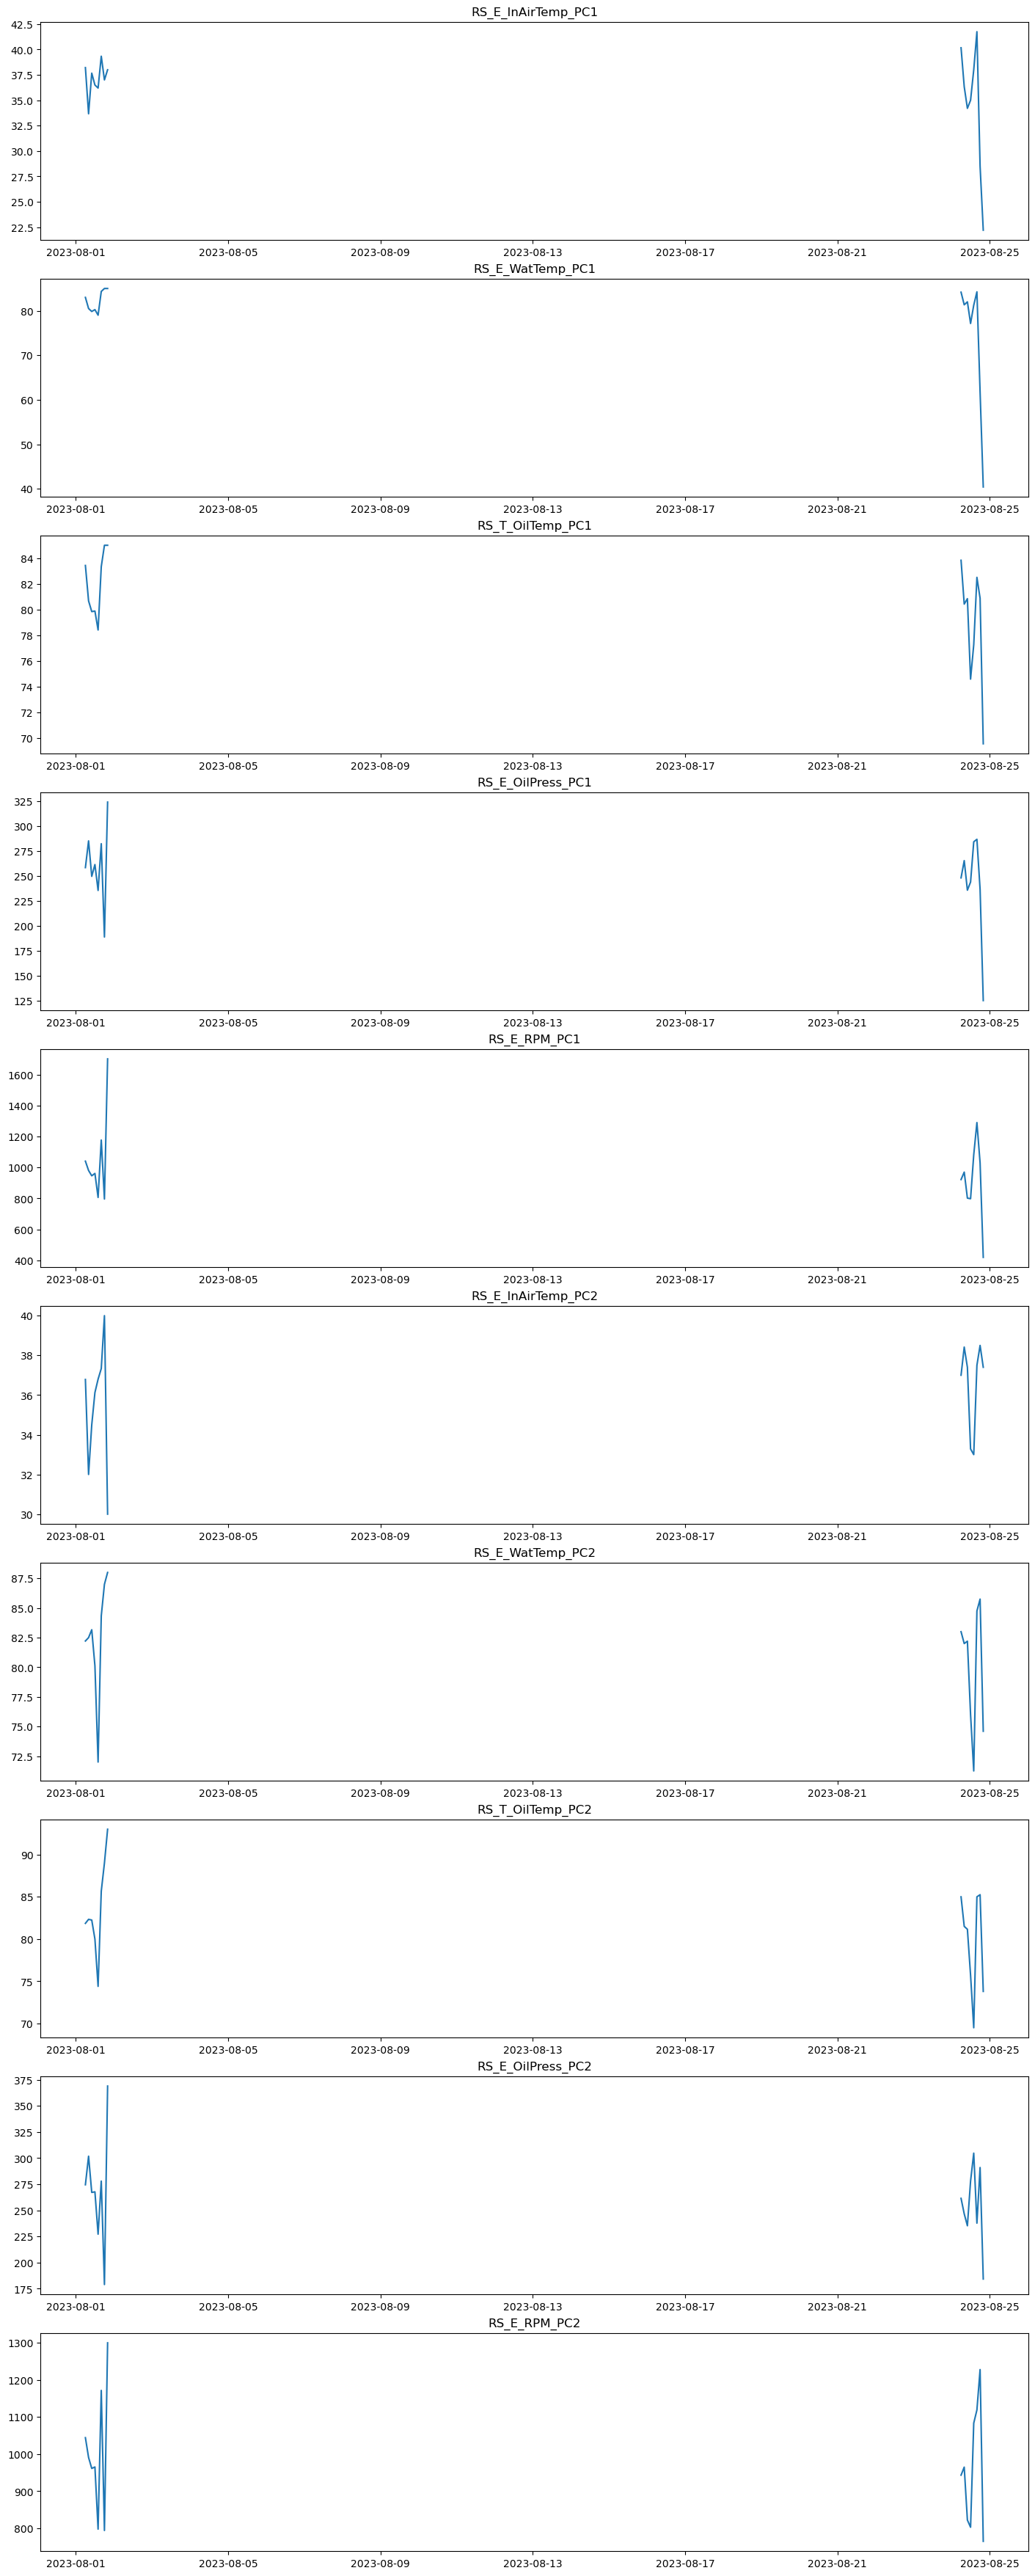

In [7]:
import matplotlib.pyplot as plt

# excluding night hours first
df_resampled['hour'] = df_resampled['timestamps_UTC'].dt.hour

# Filter out data points corresponding to night hours (for example, 11 PM to 6 AM)
night_hours = (df_resampled['hour'] < 6) | (df_resampled['hour'] >= 23)
df_filtered = df_resampled[~night_hours]

# Drop the 'hour' column if you don't need it anymore
df_filtered = df_filtered.drop('hour', axis=1)

# Initialise the subplot function using number of rows and columns 
figure, axis = plt.subplots(10, 1, layout='constrained',
                         figsize=(3.5 * 4, 3.5 * 10 ) )
  
for i, column in enumerate(df_filtered[['RS_E_InAirTemp_PC1','RS_E_WatTemp_PC1','RS_T_OilTemp_PC1','RS_E_OilPress_PC1','RS_E_RPM_PC1', 'RS_E_InAirTemp_PC2','RS_E_WatTemp_PC2','RS_T_OilTemp_PC2','RS_E_OilPress_PC2','RS_E_RPM_PC2']]):
    axis[i].plot(df_filtered['timestamps_UTC'], df_filtered[column]) 
    axis[i].set_title(column) 


# Show the plot
plt.show()

# Adding weather data

In [ ]:
for column in df_w:
    print(column)

In [50]:
df_w[['RS_E_InAirTemp_PC1','RS_E_WatTemp_PC1','RS_T_OilTemp_PC1','RS_E_OilPress_PC1','RS_E_RPM_PC1', 'temp', 'wind', 'humidity']].corr('pearson')

,RS_E_InAirTemp_PC1,RS_E_WatTemp_PC1,RS_T_OilTemp_PC1,RS_E_OilPress_PC1,RS_E_RPM_PC1,temp,wind,humidity
RS_E_InAirTemp_PC1,1.000000,0.003804,0.003059,0.002378,0.004771,0.008839,-0.002798,-0.008080
RS_E_WatTemp_PC1,0.003804,1.000000,0.848100,0.041503,0.429704,0.181987,0.018045,-0.114686
RS_T_OilTemp_PC1,0.003059,0.848100,1.000000,-0.069881,0.392710,0.196879,0.033860,-0.130342
RS_E_OilPress_PC1,0.002378,0.041503,-0.069881,1.000000,0.605196,-0.048361,-0.017595,0.034407
RS_E_RPM_PC1,0.004771,0.429704,0.392710,0.605196,1.000000,0.029888,0.007368,-0.035291
temp,0.008839,0.181987,0.196879,-0.048361,0.029888,1.000000,0.082376,-0.526384
wind,-0.002798,0.018045,0.033860,-0.017595,0.007368,0.082376,1.000000,-0.136187
humidity,-0.008080,-0.114686,-0.130342,0.034407,-0.035291,-0.526384,-0.136187,1.000000


# RPM against weather parameters

## rpm vs wind

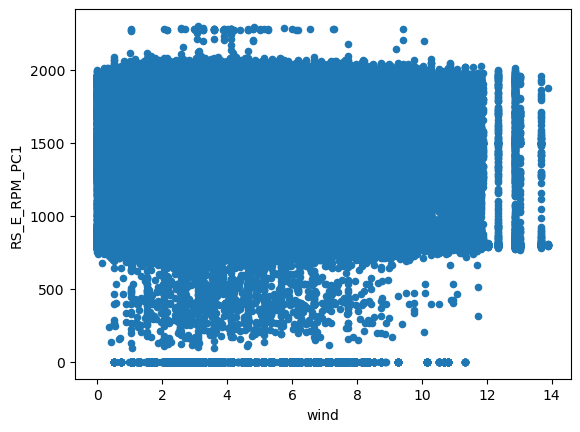

In [35]:
df.plot(y='RS_E_RPM_PC1', x='wind', kind='scatter')

# Show the plot
plt.show()

## oil temperature vs wind

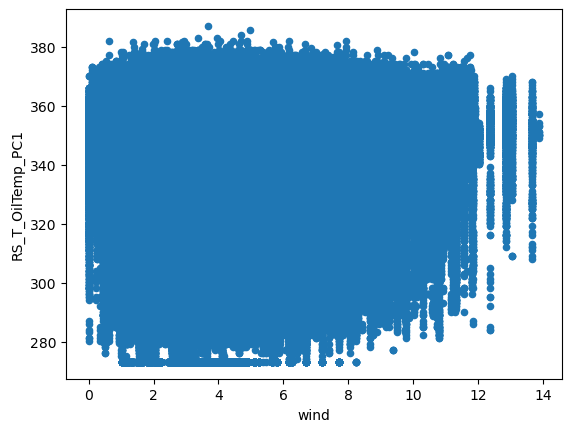

In [36]:
df.plot(y='RS_T_OilTemp_PC1', x='wind', kind='scatter')

# Show the plot
plt.show()

## oil pressure vs wind

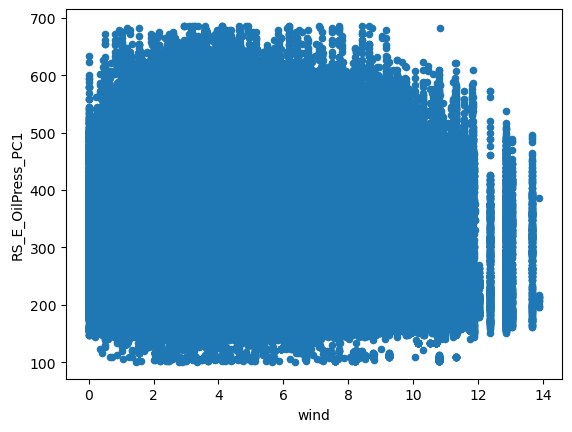

In [37]:
df.plot(y='RS_E_OilPress_PC1', x='wind', kind='scatter')

# Show the plot
plt.show()

# Principal component analysis

In [3]:
start_date = '2023-01-1'
end_date = '2023-06-30'
mask = (df['date'] > start_date) & (df['date'] <= end_date)
df_sub = df.loc[mask]

In [5]:
df_sub.head()

,Unnamed: 0.1,Unnamed: 0,mapped_veh_id,lat_x,lon_x,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,date,time,temp,wind,humidity
0,11278237,3535515,102.0,51.015546,3.774742,5.0,7.0,486.0,527.0,805.0,807.0,37.0,33.0,26.0,28.0,2023-01-23,14,276.9,4.75,82
1,11278129,3417723,102.0,51.015526,3.774732,5.0,7.0,483.0,500.0,799.0,796.0,40.0,36.0,27.0,28.0,2023-01-23,14,276.9,4.75,82
2,11280509,16698246,102.0,51.015522,3.774700,6.0,8.0,414.0,458.0,799.0,798.0,49.0,45.0,33.0,32.0,2023-01-23,14,276.9,4.75,82
3,11280227,14998954,102.0,51.015512,3.774747,7.0,8.0,372.0,417.0,794.0,801.0,52.0,48.0,36.0,38.0,2023-01-23,14,276.9,4.75,82
4,11279139,8969019,102.0,51.015525,3.774709,7.0,9.0,355.0,396.0,797.0,810.0,53.0,50.0,41.0,39.0,2023-01-23,14,276.9,4.75,82


                         PC0       PC1       PC2       PC3       PC4  \
RS_E_InAirTemp_PC1 -0.361532  0.064862  0.198812 -0.143004 -0.432122   
RS_E_InAirTemp_PC2 -0.363247  0.073580  0.187073 -0.156942 -0.409066   
RS_E_OilPress_PC1   0.120962  0.484279  0.062921  0.012950 -0.042778   
RS_E_OilPress_PC2   0.154371  0.483508  0.071522 -0.018731  0.011496   
RS_E_RPM_PC1       -0.152659  0.506760 -0.112095  0.038894  0.096671   
RS_E_RPM_PC2       -0.153028  0.506829 -0.110088  0.039450  0.090993   
RS_E_WatTemp_PC1   -0.383930 -0.045778 -0.195647  0.031725  0.169819   
RS_E_WatTemp_PC2   -0.367361 -0.054591 -0.182044  0.066879  0.077865   
RS_T_OilTemp_PC1   -0.382269 -0.035332 -0.220438  0.055275  0.188384   
RS_T_OilTemp_PC2   -0.392364 -0.041093 -0.210747  0.076737  0.087142   
temp               -0.211523 -0.016858  0.590790 -0.129789 -0.136151   
wind               -0.049289 -0.008799  0.247247  0.955735 -0.125073   
humidity            0.150184  0.004121 -0.563143  0.081449 -0.71

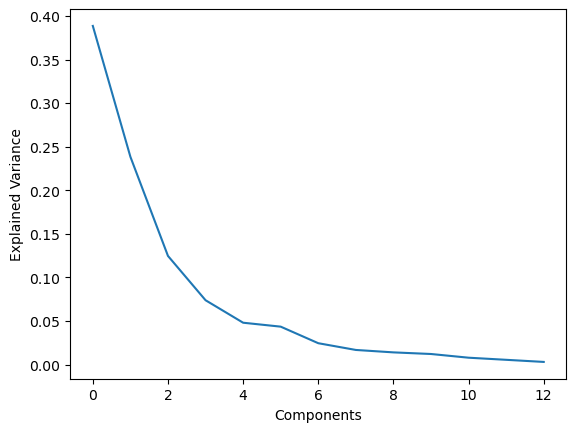

In [6]:
# You must normalize the data before applying the fit method
df_normalized=(df_sub[['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
       'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
       'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temp', 'wind', 'humidity']] - df_sub[['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
       'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
       'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temp', 'wind', 'humidity']].mean()) / df_sub[['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
       'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
       'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temp', 'wind', 'humidity']].std()
pca = PCA(n_components=df_sub[['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
       'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
       'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temp', 'wind', 'humidity']].shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df_normalized.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

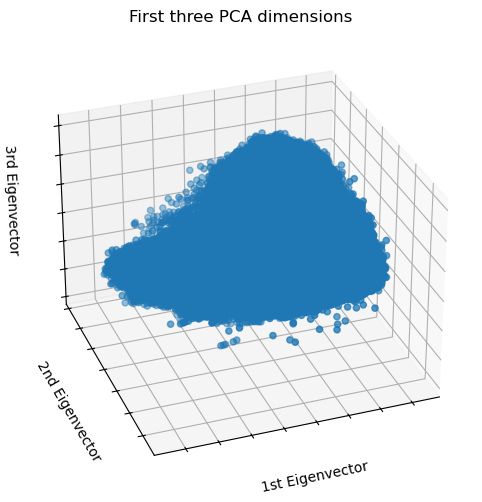

In [7]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

df_pca_ = pca.fit_transform(df_normalized)
ax.scatter(
    df_pca_[:, 0],
    df_pca_[:, 1],
    df_pca_[:, 2]
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

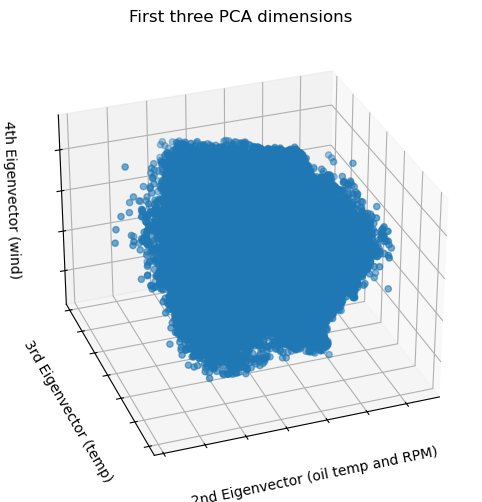

In [8]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    df_pca_[:, 1],
    df_pca_[:, 2],
    df_pca_[:, 3]
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("2nd Eigenvector (oil temp and RPM)")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("3rd Eigenvector (temp)")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("4th Eigenvector (wind)")
ax.zaxis.set_ticklabels([])

plt.show()

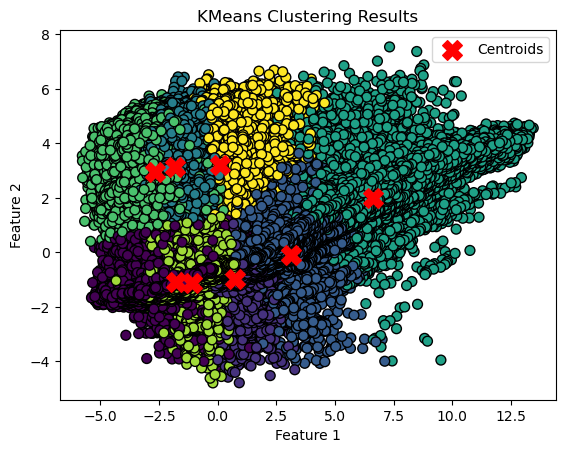

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_init=1)
kmeans.fit(df_pca_)
# Get cluster assignments and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points with color-coded clusters
plt.scatter(df_pca_[:, 0], df_pca_[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

C:\Users\alexa\.conda\envs\infoh423\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alexa\.conda\envs\infoh423\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alexa\.conda\envs\infoh423\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alexa\.conda\envs\infoh423\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

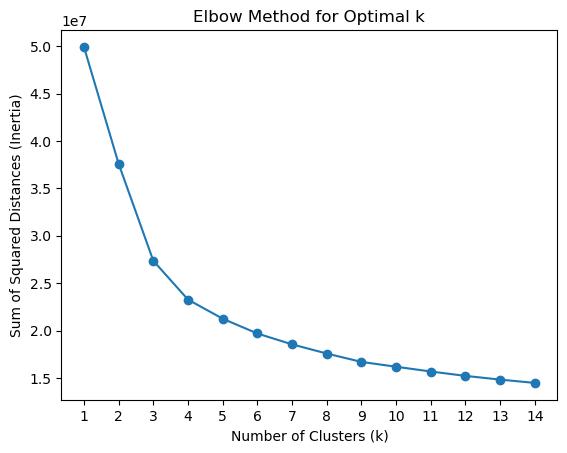

In [16]:
k_values = range(1, 15)

# Calculate the sum of squared distances (inertia) for each k
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.xticks(k_values)
plt.show()

## Local outlier factor

In [8]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=5, contamination='auto', n_jobs=6)
y_pred = clf.fit_predict(df_pca_)

X_scores = clf.negative_outlier_factor_

In [9]:
y_pred.shape
numpy.count_nonzero(y_pred == -1)/numpy.count_nonzero(y_pred == 1)

0.03511320653496912

In [ ]:
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(df_pca_[:, 0], df_pca_[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    df_pca_[:, 0],
    df_pca_[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors")
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

C:\Users\alexa\.conda\envs\infoh423\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
